<a href="https://colab.research.google.com/github/PatraShivangi/Payment_fraud_detection/blob/main/payment_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Payment Fraud Detection using Python
#This project detects fraudulent transactions using machine learning.
#The dataset used is the **Inclusive Indian Fraud Dataset** from Kaggle.
#I’ll be cleaning the data, analyzing it, handling imbalance, and training ML models to detect frauds.



In [1]:
import pandas as pd
df = pd.read_csv("Inclusive_Indian_Online_Scam_Dataset (1).csv")
df.head()
from google.colab import files
uploaded = files.upload()



Saving Inclusive_Indian_Online_Scam_Dataset (1).csv to Inclusive_Indian_Online_Scam_Dataset (1) (1).csv


,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,fraud_type
0,1.0,684415.0,2028.0,1262.770,11/24/2023 22:39,0.0,Rupay,Bangalore,NaN,28.0,Identity theft
1,2.0,447448.0,2046.0,2222.928,03/30/2024 16:18,0.0,MasterCard,Surat,POS,62.0,Malware
2,3.0,975001.0,2067.0,7509.832,03/07/2024 18:27,0.0,MasterCard,Hyderabad,POS,24.0,Malware
3,4.0,976547.0,NaN,2782.965,02/01/2024 00:58,0.0,Rupay,Hyderabad,Digital,62.0,Payment card fraud
4,5.0,935741.0,2044.0,NaN,12/22/2023 18:42,0.0,NaN,Bangalore,Digital,19.0,scam


In [3]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values in each column:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("\nAfter cleaning, new shape:", df.shape)
df.head()

Shape of dataset: (1200, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     1124 non-null   float64
 1   customer_id        1132 non-null   float64
 2   merchant_id        1133 non-null   float64
 3   amount             1098 non-null   float64
 4   transaction_time   1118 non-null   object 
 5   is_fraudulent      1092 non-null   float64
 6   card_type          1115 non-null   object 
 7   location           1122 non-null   object 
 8   purchase_category  1117 non-null   object 
 9   customer_age       1103 non-null   float64
 10  fraud_type         1122 non-null   object 
dtypes: float64(6), object(5)
memory usage: 144.8+ KB

Missing Values in each column:
transaction_id        76
customer_id           68
merchant_id           67
amount               102
transaction_time      82
is_fraudulent      

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,fraud_type
0,1.0,684415.0,2028.0,1262.770,11/24/2023 22:39,0.0,Rupay,Bangalore,NaN,28.0,Identity theft
1,2.0,447448.0,2046.0,2222.928,03/30/2024 16:18,0.0,MasterCard,Surat,POS,62.0,Malware
2,3.0,975001.0,2067.0,7509.832,03/07/2024 18:27,0.0,MasterCard,Hyderabad,POS,24.0,Malware
3,4.0,976547.0,NaN,2782.965,02/01/2024 00:58,0.0,Rupay,Hyderabad,Digital,62.0,Payment card fraud
4,5.0,935741.0,2044.0,NaN,12/22/2023 18:42,0.0,NaN,Bangalore,Digital,19.0,scam


In [5]:
df['amount'].fillna(df['amount'].mean(), inplace=True)
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['card_type'].fillna('Unknown', inplace=True)
df['location'].fillna('Unknown', inplace=True)
df['purchase_category'].fillna('Unknown', inplace=True)
df['fraud_type'].fillna('Unknown', inplace=True)
df = df.dropna(subset=['is_fraudulent'])
print("Missing Values After Cleaning:\n", df.isnull().sum())
print("\nShape After Handling Missing Values:", df.shape)
df.head()


Missing Values After Cleaning:
 transaction_id       67
customer_id          61
merchant_id          63
amount                0
transaction_time     75
is_fraudulent         0
card_type             0
location              0
purchase_category     0
customer_age          0
fraud_type            0
dtype: int64

Shape After Handling Missing Values: (1092, 11)


/tmp/ipython-input-213520277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(df['amount'].mean(), inplace=True)
/tmp/ipython-input-213520277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,fraud_type
0,1.0,684415.0,2028.0,1262.770000,11/24/2023 22:39,0.0,Rupay,Bangalore,Unknown,28.0,Identity theft
1,2.0,447448.0,2046.0,2222.928000,03/30/2024 16:18,0.0,MasterCard,Surat,POS,62.0,Malware
2,3.0,975001.0,2067.0,7509.832000,03/07/2024 18:27,0.0,MasterCard,Hyderabad,POS,24.0,Malware
3,4.0,976547.0,NaN,2782.965000,02/01/2024 00:58,0.0,Rupay,Hyderabad,Digital,62.0,Payment card fraud
4,5.0,935741.0,2044.0,6154.454166,12/22/2023 18:42,0.0,Unknown,Bangalore,Digital,19.0,scam


/tmp/ipython-input-3147800223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraudulent', data=df, palette='viridis')


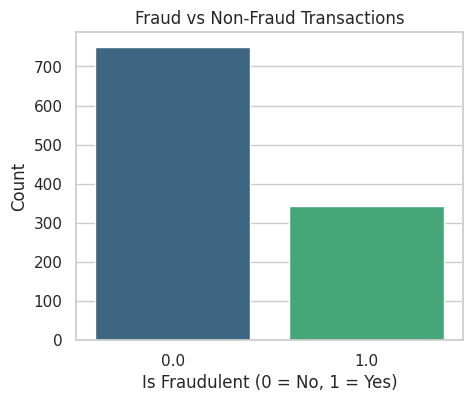

/tmp/ipython-input-3147800223.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_fraudulent', y='amount', data=df, palette='mako')


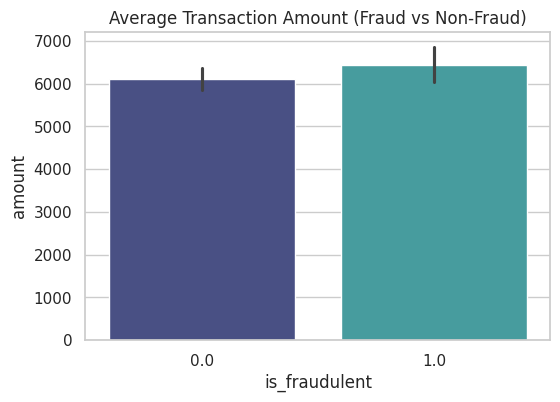

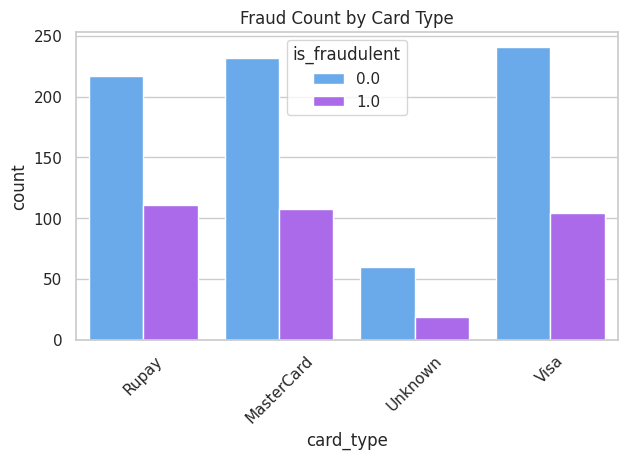

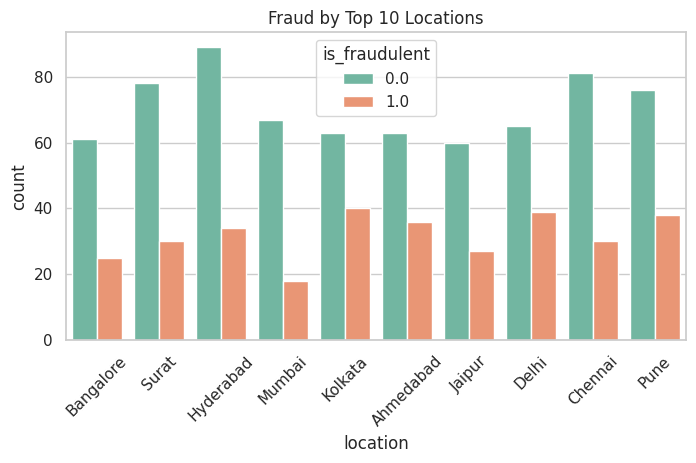

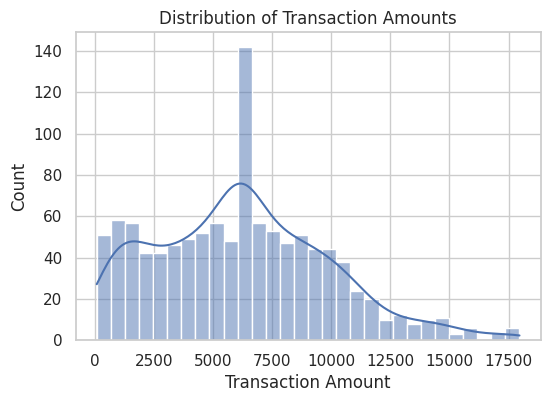

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(5,4))
sns.countplot(x='is_fraudulent', data=df, palette='viridis')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraudulent (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='is_fraudulent', y='amount', data=df, palette='mako')
plt.title("Average Transaction Amount (Fraud vs Non-Fraud)")
plt.show()

plt.figure(figsize=(7,4))
sns.countplot(x='card_type', hue='is_fraudulent', data=df, palette='cool')
plt.title("Fraud Count by Card Type")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
top_locations = df['location'].value_counts().head(10).index
sns.countplot(x='location', hue='is_fraudulent', data=df[df['location'].isin(top_locations)], palette='Set2')
plt.title("Fraud by Top 10 Locations")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
label_enc = LabelEncoder()
categorical_cols = ['card_type', 'location', 'purchase_category', 'fraud_type']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

X = df.drop(columns=['is_fraudulent', 'transaction_id', 'transaction_time'])
y = df['is_fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/tmp/ipython-input-3054978832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col].astype(str))
/tmp/ipython-input-3054978832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col].astype(str))
/tmp/ipython-input-3054978832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

 Model Accuracy: 0.6484018264840182

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.93      0.78       150
         1.0       0.21      0.04      0.07        69

    accuracy                           0.65       219
   macro avg       0.45      0.49      0.43       219
weighted avg       0.53      0.65      0.56       219



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
label_enc = LabelEncoder()
categorical_cols = ['card_type', 'location', 'purchase_category', 'fraud_type']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

X = df.drop(columns=['is_fraudulent', 'transaction_id', 'transaction_time'])
y = df['is_fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/tmp/ipython-input-2384413812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col].astype(str))
/tmp/ipython-input-2384413812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col].astype(str))
/tmp/ipython-input-2384413812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

✅ Model Accuracy: 0.6712328767123288

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.96      0.80       150
         1.0       0.33      0.04      0.08        69

    accuracy                           0.67       219
   macro avg       0.51      0.50      0.44       219
weighted avg       0.57      0.67      0.57       219



In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(" New Accuracy:", accuracy_score(y_test, y_pred))
print("\nNew Classification Report:\n", classification_report(y_test, y_pred))


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values